In [1]:
# import packages

# general tools
import numpy as np
import umap 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

/home/wangp5/miniconda3/envs/tutorial/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-27 12:16:28.156868: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 12:16:29.581289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 12:16:33.153818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [28]:
data=np.load("/mnt/isilon/wang_lab/shared/Belka/analysis/morgan_shuffled_train/data_train0.npz")

In [3]:
import numpy as np
import os, random
from pathlib import Path

def get_train_files(input_list):
    out_list=[]
    if type(input_list)==type(None):
        return out_list
    for item in input_list:
        
        if os.path.isdir(item):
            out_list.extend(list(Path(item).rglob("*.npz")))

        elif item[-4:]=='.npz':
            out_list.append(item)        
    
    random.seed(0)
    random.shuffle(out_list)
    return out_list

In [29]:
np.mean(data['protein'],axis=0)

array([0.333174, 0.332486, 0.33434 ])

In [30]:
for file in get_train_files(['/mnt/isilon/wang_lab/shared/Belka/analysis/morgan_shuffled_train/']):
    data=np.load(file)
    print(np.mean(data['protein'],axis=0))

[0.333124 0.333236 0.33364 ]
[0.334876 0.332182 0.332942]
[0.333632 0.332944 0.333424]
[0.33391 0.33255 0.33354]
[0.333772 0.333874 0.332354]
[0.33248  0.334424 0.333096]
[0.332442 0.333104 0.334454]
[0.33313  0.334054 0.332816]
[0.333282 0.333184 0.333534]
[0.33226  0.334316 0.333424]
[0.332902 0.3335   0.333598]
[0.333908 0.332784 0.333308]
[0.334242 0.332536 0.333222]
[0.332854 0.33351  0.333636]
[0.332662 0.332782 0.334556]
[0.334144 0.333216 0.33264 ]
[0.332992 0.333466 0.333542]
[0.332914 0.334022 0.333064]
[0.33299  0.333444 0.333566]
[0.332958 0.33335  0.333692]
[0.333124 0.333336 0.33354 ]
[0.333228 0.333782 0.33299 ]
[0.33306  0.333608 0.333332]
[0.333164 0.332844 0.333992]
[0.333574 0.333752 0.332674]
[0.332758 0.332804 0.334438]
[0.332808 0.333802 0.33339 ]
[0.334058 0.333504 0.332438]
[0.332842 0.334038 0.33312 ]
[0.333684 0.333186 0.33313 ]
[0.33321  0.332806 0.333984]
[0.332334 0.333102 0.334564]
[0.332444 0.33299  0.334566]
[0.333494 0.333388 0.333118]
[0.33468 0.33333 

[0.33241  0.334812 0.332778]
[0.334206 0.332808 0.332986]
[0.332486 0.334516 0.332998]
[0.332646 0.333818 0.333536]
[0.333814 0.332552 0.333634]
[0.33362  0.332562 0.333818]
[0.333076 0.33397  0.332954]
[0.332896 0.332618 0.334486]
[0.332936 0.33406  0.333004]
[0.333658 0.333296 0.333046]
[0.332792 0.333558 0.33365 ]
[0.333976 0.33206  0.333964]
[0.333706 0.332602 0.333692]
[0.333824 0.333536 0.33264 ]
[0.333614 0.334224 0.332162]
[0.33239 0.33443 0.33318]
[0.333438 0.333008 0.333554]
[0.333268 0.33247  0.334262]
[0.333134 0.333802 0.333064]
[0.333456 0.33381  0.332734]
[0.332896 0.333622 0.333482]
[0.332836 0.333606 0.333558]
[0.334202 0.33369  0.332108]
[0.333008 0.333452 0.33354 ]
[0.33454  0.332662 0.332798]
[0.33366  0.333418 0.332922]
[0.334654 0.333706 0.33164 ]
[0.333372 0.333688 0.33294 ]
[0.332026 0.334314 0.33366 ]
[0.333304 0.332406 0.33429 ]
[0.332404 0.334234 0.333362]
[0.333418 0.333046 0.333536]
[0.334278 0.332308 0.333414]
[0.3335   0.333992 0.332508]
[0.33337  0.33379

In [39]:
p_map = {'BRD4': 0, 'HSA': 1, 'sEH': 2}

In [48]:
p_list=['BRD4', 'HSA', 'sEH']

In [63]:
for p in p_list:
    p_filter = data['protein'][:,p_map.get(p)]==1
    print(np.mean(data['labels'][p_filter]))

0.004641053813409224
0.004269660226196044
0.007649158592554819


In [60]:
p_filter = data['protein'][:,1]==1
np.mean(data['labels'][p_filter])


0.004269660226196044

In [65]:
p=[]
p.append(1)
p

[1]

In [96]:
df=[]
t=0
for file in get_train_files(['/mnt/isilon/wang_lab/shared/Belka/analysis/morgan_shuffled_train/']):
    data=np.load(file)
    p_percent=[]
    for p in p_list:
        p_filter = data['protein'][:,p_map.get(p)]==1
        p_percent.append(np.mean(data['labels'][p_filter]))
    
    t+=np.sum(data['labels'])
    df.append([np.sum(data['labels']), np.mean(data['labels']), p_percent[0], p_percent[1],p_percent[2]])
    print(np.sum(data['labels']), np.mean(data['labels']),p_percent[0], p_percent[1],p_percent[2])

2735 0.00547 0.0047790012127616145 0.004087193460490463 0.0075410622227550655
2694 0.005388 0.00462857893668104 0.004070057980263831 0.007466765983264352
2666 0.005332 0.0046758104738154616 0.004072756980152819 0.007246029080090216
2649 0.005298 0.004504207720643287 0.004095624718087505 0.007291479282844637
2651 0.005302 0.004565991155639179 0.0042471111856568645 0.007100862333535928
2781 0.005562 0.004679980750721848 0.004216204578618759 0.0077935490068929076
2667 0.005334 0.004584258306712149 0.004304961813727845 0.007104115962135301
2733 0.005466 0.004604808933449404 0.004107120405682913 0.007691937887601558
2671 0.005342 0.004902755024273738 0.003913753361505954 0.007207660988085173
2680 0.00536 0.004484439896466623 0.004289354981514495 0.007306012764528048
2708 0.005416 0.004986452469495527 0.004083958020989506 0.007176302016199138
2673 0.005346 0.0047438216514728605 0.004104764652146738 0.007188546329521044
2663 0.005326 0.004667277002890121 0.004023624509827507 0.007286433668845

2621 0.005242 0.004436238070116541 0.004062966986142702 0.007228409329691112
2681 0.005362 0.004667346571479993 0.004231438689154312 0.0071865626874625076
2688 0.005376 0.004530806483554073 0.004263868065967016 0.007334361664455955
2663 0.005326 0.004485247319058998 0.004001031750316423 0.007490389632197281
2696 0.005392 0.004383181039748027 0.004064576941781089 0.007732655599415995
2626 0.005252 0.004533314170050184 0.0041718765028373565 0.007050197405527355
2668 0.005336 0.004862207442178749 0.0042294729379817484 0.006911917967392997
2726 0.005452 0.004614959911661626 0.0043250571375440154 0.0074160741607416075
2617 0.005234 0.0043377553169088225 0.004362552661815396 0.0070013978797823385
2706 0.005412 0.004648281999783521 0.00408251353344244 0.007501812538572618
2666 0.005332 0.004546794089167684 0.00403117441547971 0.007427052512568858
2687 0.005374 0.004603509951264015 0.0040406102342113006 0.0074747196230871135
2666 0.005332 0.004480178966612143 0.0042278873121520365 0.0072917730

2788 0.005576 0.004918714624134252 0.004262824345330623 0.007546016314739006
2728 0.005456 0.004642731074588825 0.004190631716718099 0.007540816019723984
2728 0.005456 0.004486705278795205 0.004207531541481099 0.0076649214659685865
2607 0.005214 0.0044257353206105954 0.004148432348180565 0.007068113089809437
2756 0.005512 0.004791087019092392 0.004234005369079149 0.007509461801910954
2709 0.005418 0.004687857306197119 0.004043611094470736 0.007519652957530438
2728 0.005456 0.004566292350859484 0.0042929489210826845 0.007515994035307134
2718 0.005436 0.004629713138163868 0.00416469417961517 0.007511810268338889
2662 0.005324 0.00461375584990556 0.00406282722513089 0.007297474089766133
2718 0.005436 0.0046953148923139735 0.004252133552927085 0.007364424902087989
2639 0.005278 0.00444348628028697 0.004014497797726918 0.007381227159069052
2806 0.005612 0.004758508680982146 0.004390273119310014 0.007696427389412749
2668 0.005336 0.004832395033305154 0.004124848615657637 0.007054652525313223

2677 0.005354 0.004581709145427286 0.0041797408321157395 0.00730809484283085
2703 0.005406 0.004739478657347692 0.004116335921771642 0.007366947283663524
2659 0.005318 0.004595018855214805 0.004161719377780976 0.007192693516993562
2722 0.005444 0.004689359818646187 0.004068925310879116 0.007576758997776843
2731 0.005462 0.004797313504437515 0.004263035281120158 0.0073248866172341805
2756 0.005512 0.005030676319802135 0.004103950800449879 0.00740981319091095
2636 0.005272 0.004509056985151209 0.0040787106942831875 0.007228973533791249
2661 0.005322 0.004276327643575298 0.004468838102093455 0.007218571634131133
2763 0.005526 0.004527755680628742 0.004467027079094073 0.007582347048343461
2815 0.00563 0.004754955321363207 0.004720072635003097 0.007417640169374456
2777 0.005554 0.004986122958993644 0.004100525923969165 0.007570040844682406
2633 0.005266 0.004716924445085385 0.004077520867312674 0.00700197829866315
2710 0.00542 0.004368020793222949 0.0044153553581177145 0.007468536992597291


2640 0.00528 0.004489014517280905 0.004118289769111626 0.007230345869530028
2726 0.005452 0.004638726152921736 0.004118141433545444 0.007593041707835564
2711 0.005422 0.004594162286978797 0.0042311680061369915 0.00743804129581348
2691 0.005382 0.004833996705186325 0.004215538125734571 0.007093473285644104
2634 0.005268 0.004659737109161548 0.0042673059634402155 0.006878049658798322
2705 0.00541 0.004651720417216161 0.003936984246061515 0.007643120890996968
2732 0.005464 0.004615430783542898 0.004212816336832996 0.007557429276355187
2636 0.005272 0.00439498504026238 0.0041611533878973305 0.0072684388500463305
2679 0.005358 0.004649293307417273 0.004017795661259708 0.007414266901582071
2634 0.005268 0.004584372277465677 0.0041511620267227324 0.007078282433099397
2716 0.005432 0.004617335342950789 0.004038097527266172 0.007644736130393235
2633 0.005266 0.004691906161876763 0.003615581290419612 0.007480326740672032
2630 0.00526 0.004468838102093455 0.00417674346033594 0.00713458503597295
2

In [97]:
import pandas as pd
df = pd.DataFrame(df)

In [98]:
df

,0,1,2,3,4
0,2735,0.005470,0.004779,0.004087,0.007541
1,2694,0.005388,0.004629,0.004070,0.007467
2,2666,0.005332,0.004676,0.004073,0.007246
3,2649,0.005298,0.004504,0.004096,0.007291
4,2651,0.005302,0.004566,0.004247,0.007101
...,...,...,...,...,...
468,2694,0.005388,0.004603,0.004202,0.007360
469,2722,0.005444,0.004658,0.004367,0.007308
470,2681,0.005362,0.004805,0.004003,0.007291
471,2730,0.005460,0.004686,0.004213,0.007484


In [99]:
df=df.rename(columns={0:'num_positive', 1:'percent_positive',2:p_list[0],3:p_list[1],4:p_list[2]})

In [100]:
df.describe()

,num_positive,percent_positive,BRD4,HSA,sEH
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,2687.446089,0.005382,0.004641,0.004151,0.007355
std,91.888783,0.000099,0.000159,0.000151,0.000209
min,1007.000000,0.005146,0.004229,0.003616,0.006815
25%,2655.000000,0.005310,0.004536,0.004054,0.007210
50%,2692.000000,0.005384,0.004643,0.004160,0.007356
75%,2725.000000,0.005450,0.004753,0.004250,0.007503
max,2846.000000,0.005692,0.005059,0.004720,0.008034


<Axes: title={'center': 'train batch files'}>

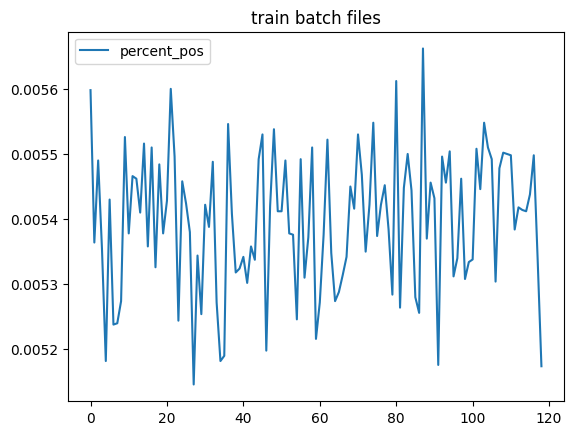

In [75]:
df[['percent_pos']].plot(title="train batch files")

In [102]:
df.describe()

,num_positive,percent_positive,BRD4,HSA,sEH
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,2687.446089,0.005382,0.004641,0.004151,0.007355
std,91.888783,0.000099,0.000159,0.000151,0.000209
min,1007.000000,0.005146,0.004229,0.003616,0.006815
25%,2655.000000,0.005310,0.004536,0.004054,0.007210
50%,2692.000000,0.005384,0.004643,0.004160,0.007356
75%,2725.000000,0.005450,0.004753,0.004250,0.007503
max,2846.000000,0.005692,0.005059,0.004720,0.008034


<Axes: title={'center': 'train batch files'}>

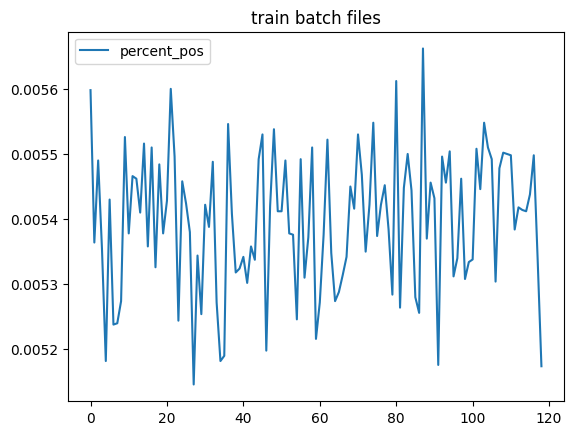

In [9]:
df.rename(columns={0:'num_positive', 1:'percent_positive'})[['percent_pos']].plot(title="train batch files")

In [10]:
1/471

0.0021231422505307855

In [11]:
122111 /t

0.383100544637703

In [12]:
train_files=get_train_files(['/mnt/isilon/wang_lab/shared/Belka/analysis/morgan_shuffled_train/'])[:30]

In [13]:
pos_list=[]
neg_list=[]
pos_label_list=[]
neg_label_list=[]

p_id=1

for file in train_files:
    data=np.load(file)
    morgan=data['morgan']
    protein=np.argmax(data['protein'], axis=1)
    labels=data['labels']

    pos_idx=np.where((labels==1)& (protein==p_id))[0]
    pos_morgan=np.hstack([data['morgan1'][pos_idx], data['morgan2'][pos_idx], data['morgan3'][pos_idx]])
    
    neg_idx=np.where((labels==0)& (protein==p_id))[0]
    neg_idx=np.random.choice(neg_idx, size=min(len(neg_idx), len(pos_idx)), replace=False)
    
    neg_morgan=np.hstack([data['morgan1'][neg_idx], data['morgan2'][neg_idx], data['morgan3'][neg_idx]])
    
    pos_list.append(pos_morgan)
    neg_list.append(neg_morgan)
    
    pos_label_list.append(labels[pos_idx])
    neg_label_list.append(labels[neg_idx])
    print(".", end="")
    

..............................

In [14]:
sum(data['labels'])

2735

In [15]:
pos_label_list=np.concatenate(pos_label_list)
neg_label_list=np.concatenate(neg_label_list)

pos_list=np.concatenate(pos_list)
neg_list=np.concatenate(neg_list)

total_list=np.concatenate([neg_list, pos_list])
total_label_list=np.concatenate([neg_label_list, pos_label_list])

perm=np.random.permutation(np.arange(len(total_label_list)))
total_list=total_list[perm]
total_label_list=total_label_list[perm]

In [16]:
np.mean(total_label_list)

0.5

In [17]:
total_list.shape

(41616, 3072)

In [18]:
color=["blue" if x else "red" for x in total_label_list]

In [23]:
color2=["red" if x else "blue" for x in total_label_list]

In [24]:
color_list=[color,color2]

In [19]:
reducer = umap.UMAP(metric="cosine")
reducer.fit(total_list)
embedding=reducer.transform(total_list)

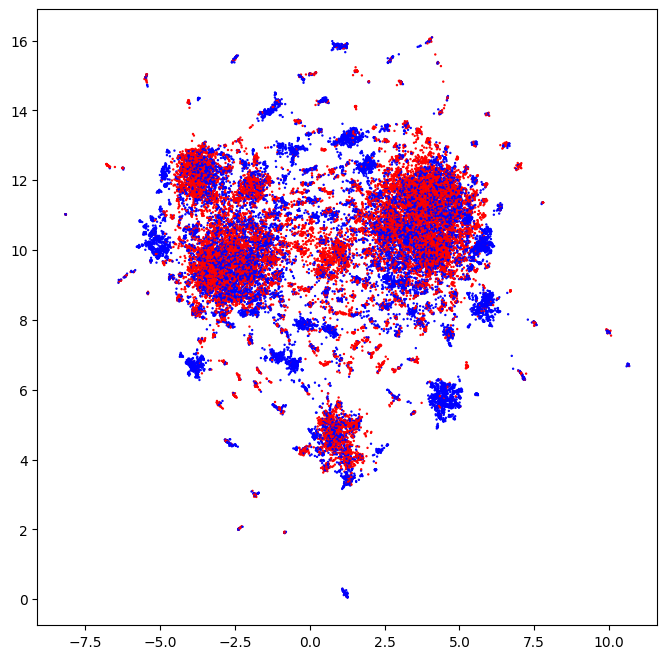

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], color=color, s=0.5)

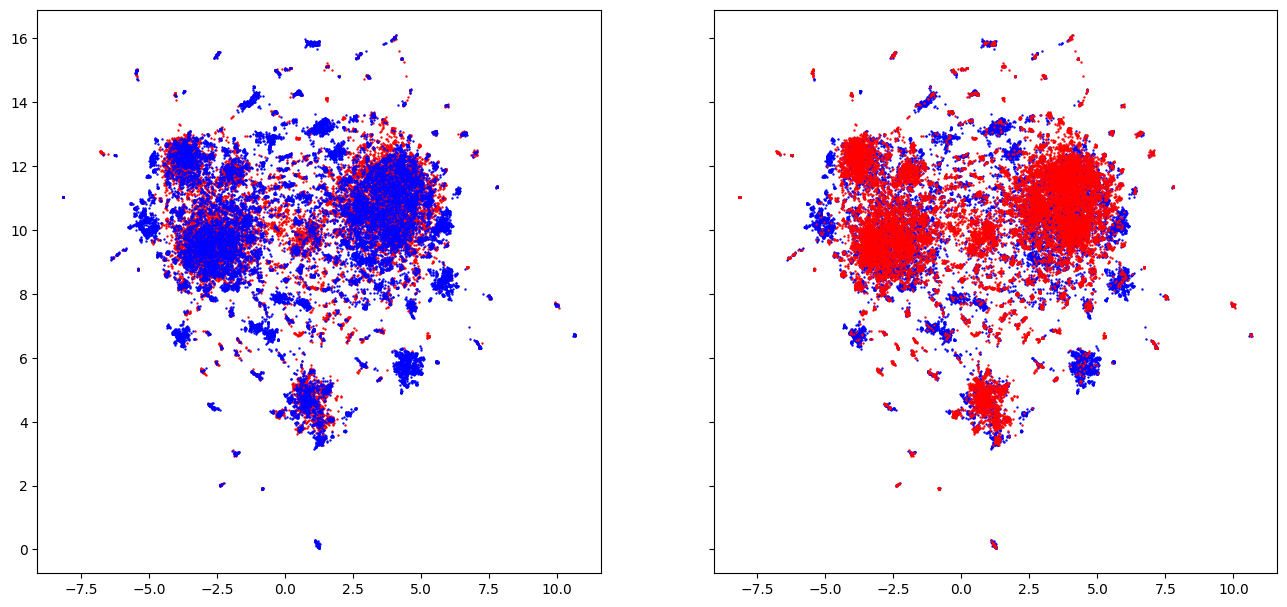

In [27]:
fig, axs = plt.subplots(1,2, figsize=(16, 8), sharex=True, sharey=True, squeeze=True, )

i=0
inds=(total_label_list==i)
axs[0].scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])

i=1
inds=(total_label_list==i)
axs[0].scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])
axs[0].set_box_aspect(aspect=1)

i=1
inds=(total_label_list==i)
axs[1].scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])

i=0
inds=(total_label_list==i)
axs[1].scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])

axs[1].set_box_aspect(aspect=1)
plt.show()

In [262]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import optim, Tensor

from torch.nn.parallel import DataParallel

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(3075,2048)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2=nn.Linear(2048,1024)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4=nn.Linear(1024,512)
        self.fc5=nn.Linear(512,128)
        self.out=nn.Linear(128,1)
        
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc4(x))
        x=F.relu(self.fc5(x))
        out=self.out(x)
        return out
    
def generate_batches(morgan,labels, p_id, batch_size=1024):

    batch_size=max(batch_size,1)
    for local_index in range(0, morgan.shape[0], batch_size):
        batch_morgan=morgan[local_index:(local_index + batch_size)]
        batch_protein=np.eye(3)[(np.zeros(len(batch_morgan))+p_id).astype(int)]
        batch_data=np.concatenate((batch_morgan, batch_protein), 1)
        batch_labels=labels[local_index:(local_index + batch_size)] 
        
        yield batch_data, batch_labels

In [178]:
model_load_path = "/mnt/isilon/wang_lab/shared/Belka/analysis/saved_models/bldblock_NN_epoch_8.pth"
checkpoint = torch.load(model_load_path)

# load the model and continue training
dev = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(dev)
net = DataParallel(net) #do this because previous model is within DataParallel
net.load_state_dict(checkpoint['model_state_dict'])


optimizer = optim.Adam(net.parameters(), lr=0.001)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [263]:
with torch.no_grad():
    net.eval()
    features=[]
    preds = []
    labels = []
    test_loss = 0
    test_generator = generate_batches(total_list,total_label_list, 2, 4096)
    for batch in test_generator:
        batch_data, batch_labels=batch
        score = net(torch.Tensor(batch_data).to(dev))
        #loss = torch.nn.functional.binary_cross_entropy_with_logits(score, torch.Tensor(batch_labels)[:, None].to(dev), pos_weight=pos_weight_vali)
        
        preds.append(torch.sigmoid(score).cpu().numpy())
        labels.append(batch_labels)
        features.append(batch_data)
        #test_loss += loss.cpu().item() * len(score)

    preds = np.vstack(preds)[:, 0]

In [264]:
features=np.concatenate(features)
labels=np.concatenate(labels)

In [265]:
embedding=reducer.transform(features)

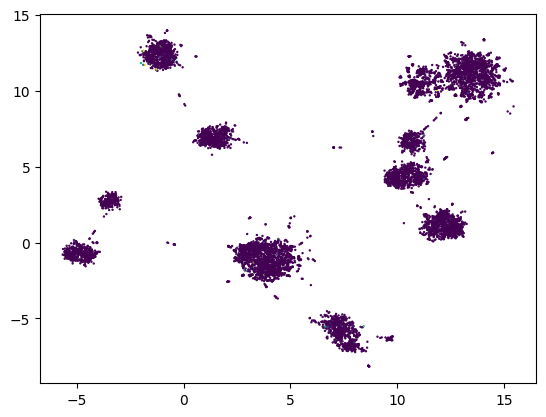

In [266]:
i=0
inds=(labels==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=0.5, c=preds[inds],cmap='viridis')

plt.show()

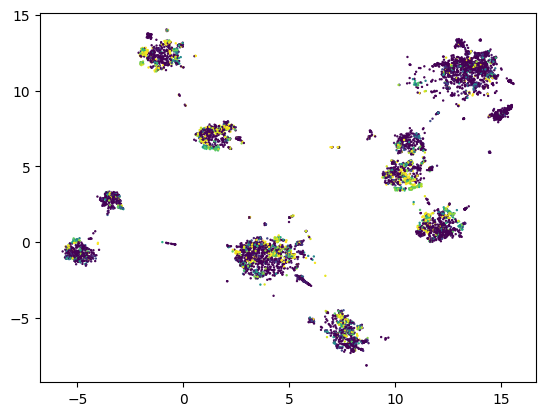

In [267]:
i=1
inds=(labels==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=0.5, c=preds[inds],cmap='viridis')

plt.show()

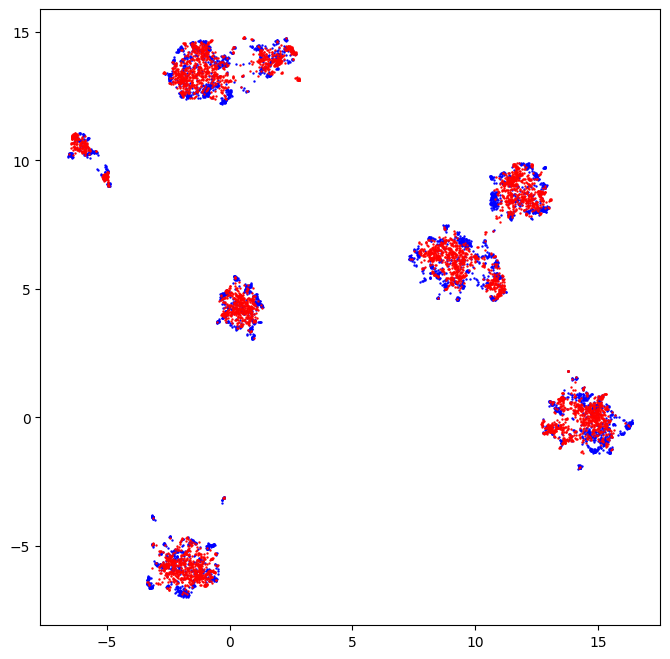

In [168]:
plt.figure(figsize=(8,8))

i=1
inds=(total_label_list==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])

i=0
inds=(total_label_list==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=0.5, color=color_list[i])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


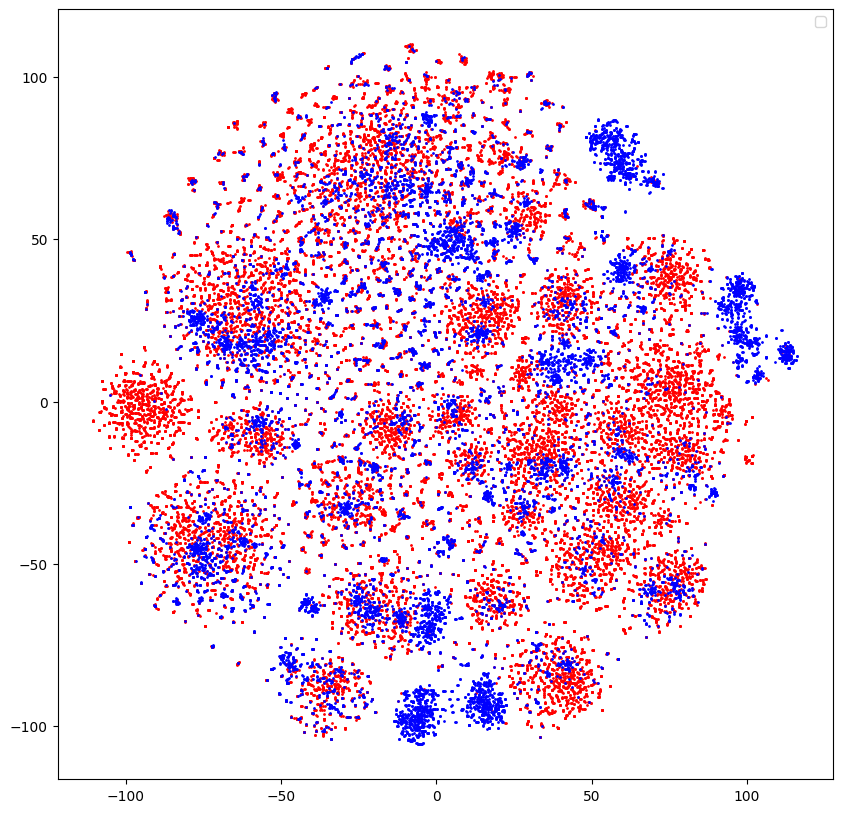

In [58]:
res=get_tsne(total_list, total_label_list)

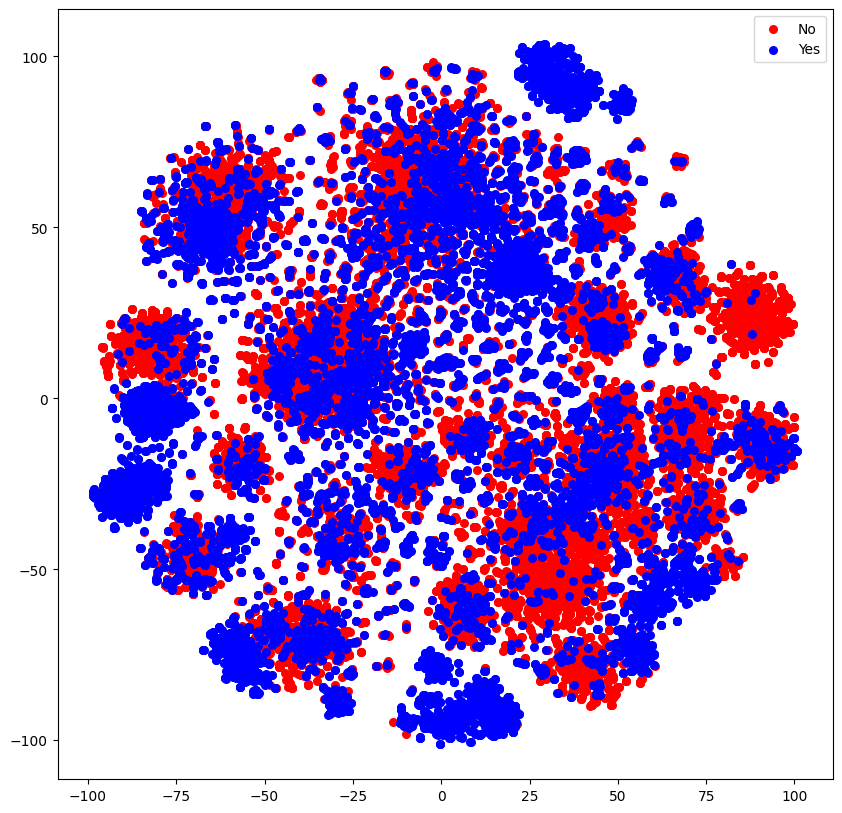

In [87]:
res=get_tsne(total_list, total_label_list)

In [26]:
color_list={0:'red', 1:'blue'}

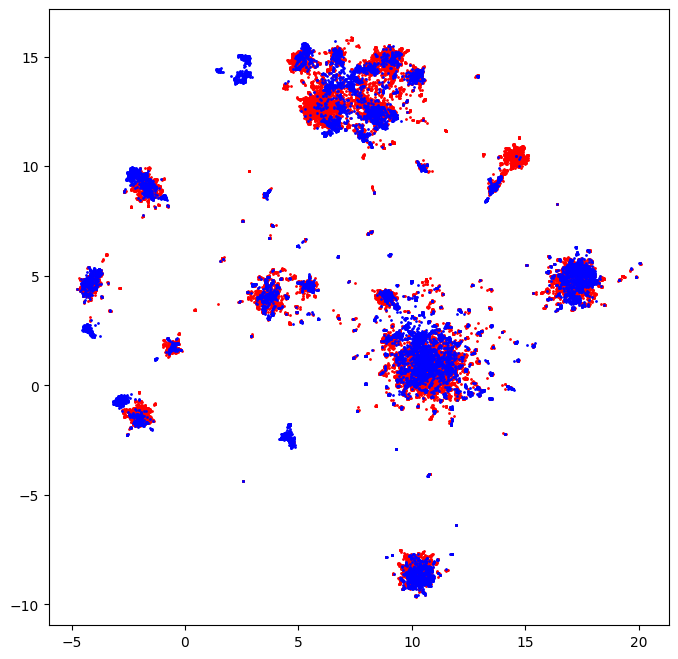

In [56]:
plt.figure(figsize=(8,8))

i=0
inds=(total_label_list==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=1, color=color_list[i])

i=1
inds=(total_label_list==i)
plt.scatter(embedding[inds,0], embedding[inds,1],s=1, color=color_list[i])
plt.show()

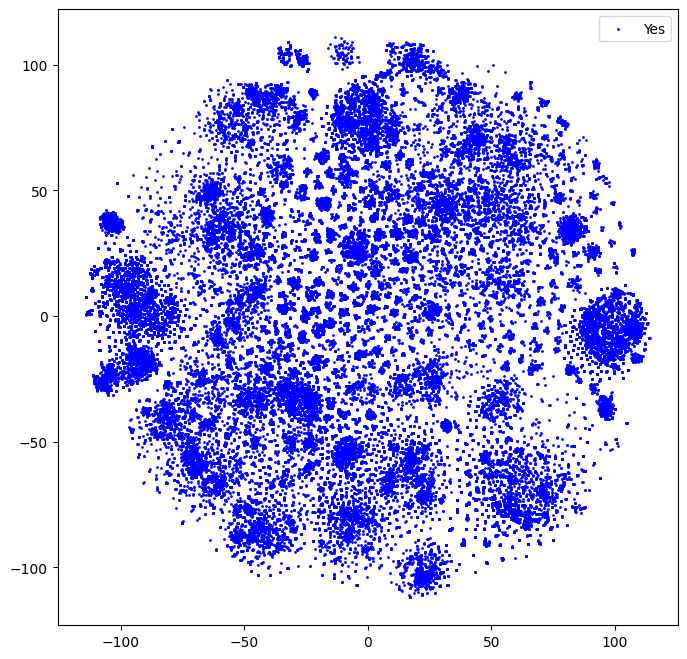

In [106]:
plt.figure(figsize=(8,8))
labels=total_label_list

i=1
X_embedded=res

inds=(labels==i)
plt.scatter(X_embedded[inds,0], X_embedded[inds,1],s=1, label=label_dict[i],color=color_list[i])
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
plt.scatter(X_embedded[inds,0], X_embedded[inds,1],s=1, alpha=0.2, label=label_dict[i],color=color_list[i])

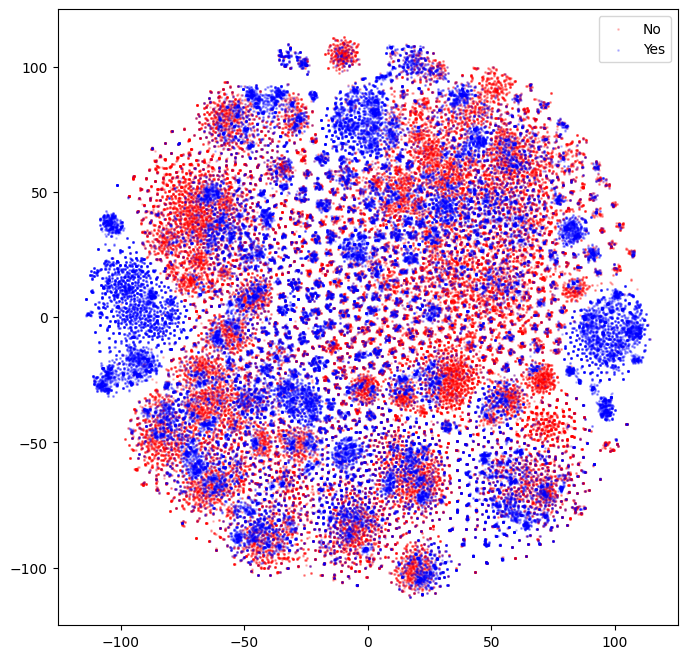

In [ ]:
plt.figure(figsize=(8,8))
labels=total_label_list


X_embedded=res
for i in [0,1]:
    inds=(labels==i)
    plt.scatter(X_embedded[inds,0], X_embedded[inds,1],s=1, alpha=0.2, label=label_dict[i],color=color_list[i])
    plt.legend(bbox_to_anchor=(1, 1))